In [34]:
import tensorflow as tf 
from tensorflow import keras
import pandas as pd 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [35]:
data = pd.read_csv('filtered_df.csv')

# Display the first few rows
data.head()

,milage,accident,clean_title,price,age,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,fuel_type_not supported,fuel_type_–,engine_1.3L I3 12V GDI DOHC Turbo,engine_1.3L I3 12V MPFI DOHC Turbo,engine_1.4L I4 16V GDI DOHC Turbo,engine_1.5 Liter Turbo,engine_1.5L I3 12V GDI DOHC Turbo,engine_1.5L I3 12V PDI DOHC Turbo,engine_1.5L I4 16V GDI DOHC Turbo,"engine_1.6L I-4 gasoline direct injection, DOHC, variable valve control",engine_1.6L I4 16V GDI DOHC,engine_1.6L I4 16V GDI DOHC Hybrid,engine_1.6L I4 16V GDI DOHC Turbo,engine_1.6L I4 16V GDI DOHC Turbo Hybrid,engine_1.6L I4 16V MPFI DOHC,engine_1.8 Liter,engine_101.0HP 1.4L 4 Cylinder Engine Gasoline Fuel,engine_1020.0HP Electric Motor Electric Fuel System,engine_104.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,engine_106.0HP 1.5L 4 Cylinder Engine Gasoline Fuel,engine_107.0HP Electric Motor Electric Fuel System,engine_109.0HP 1.5L 4 Cylinder Engine Gasoline Fuel,engine_109.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,engine_111.0HP Electric Motor Electric Fuel System,engine_111.2Ah / FR 70kW / RR 160kW (697V),engine_115.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,engine_115.0HP 1.7L 4 Cylinder Engine Gasoline Fuel,engine_115.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,engine_115.0HP Electric Motor Electric Fuel System,engine_118.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,engine_12 Cylinder Engine,...,int_col_Porpoise,int_col_Portland,int_col_Red,int_col_Red / Black,int_col_Red/Black,int_col_Rhapsody Blue,int_col_Rioja Red,int_col_Roast,int_col_Rock Gray,int_col_Saddle Brown,int_col_Sahara Tan,int_col_Saiga Beige,int_col_Sakhir Orange,int_col_Sakhir Orange/Black,int_col_Sand Beige,int_col_Sandstone,int_col_Sarder Brown,int_col_Satin Black,int_col_Shale,int_col_Shara Beige,int_col_Silk Beige/Black,int_col_Silk Beige/Espresso Brown,int_col_Silver,int_col_Slate,int_col_Sport,int_col_Tan,int_col_Tan/Ebony,int_col_Tan/Ebony/Ebony,int_col_Tension,int_col_Titan Black,int_col_Titan Black / Quarzit,int_col_Tupelo,int_col_Very Light Cashmere,int_col_WHITE,int_col_Walnut,int_col_Whisper Beige,int_col_White,int_col_White / Brown,int_col_Yellow,int_col_–
0,51000,1.0,1,10300,11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,34742,1.0,1,38005,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,22372,0.0,0,54598,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,88900,0.0,1,15500,9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9835,0.0,0,34999,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
features = data.drop('price', axis=1)
target = data['price']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [56]:
# Define a simple neural network for regression
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Single unit for regression output
])

# Compile the model
model.compile(optimizer='adam',
              loss='mse',  # Mean Squared Error for regression
              metrics=['mae'])  # Mean Absolute Error as an additional metric

# Train the model
history = model.fit(X_train, y_train, epochs=60, batch_size=32, validation_split=0.2)

Epoch 1/60
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4590722560.0000 - mae: 43574.7070 - val_loss: 4331659264.0000 - val_mae: 43534.9453
Epoch 2/60
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4478801920.0000 - mae: 43291.7930 - val_loss: 4316704256.0000 - val_mae: 43370.1602
Epoch 3/60
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4640455680.0000 - mae: 43144.9258 - val_loss: 4263373568.0000 - val_mae: 42785.3672
Epoch 4/60
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5122182144.0000 - mae: 43420.4844 - val_loss: 4150914304.0000 - val_mae: 41518.5508
Epoch 5/60
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4161260544.0000 - mae: 39663.7734 - val_loss: 3969886208.0000 - val_mae: 39347.7578
Epoch 6/60
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3610859776.0000 - mae: 35707.2383 - val_loss: 3737421312.0000 - val_mae: 36270.9375
Epoch 7/60
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3273338112.0000 - mae: 31058.4297 - val_loss: 3493584128.0000 - val_mae: 32692.1836
Epoch 

In [38]:
# Evaluate the model on the test data
test_loss, test_mae = model.evaluate(X_test, y_test)
print("Test Loss (MSE):", test_loss)
print("Test MAE:", test_mae)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - loss: 32611684352.0000 - mae: 32767.9238
Test Loss (MSE): 18880122880.0
Test MAE: 28673.904296875


In [54]:
# Make predictions
predictions = model.predict(X_test)
print(predictions[25:30])  # Print the first 5 predictions


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step
[[ 8809.364 ]
 [ 8184.2466]
 [12329.298 ]
 [10315.165 ]
 [18174.78  ]]


In [53]:
print(y_test[25:30])

568     17000
1185    67000
2650    13000
3274    17500
1503    20784
Name: price, dtype: int64


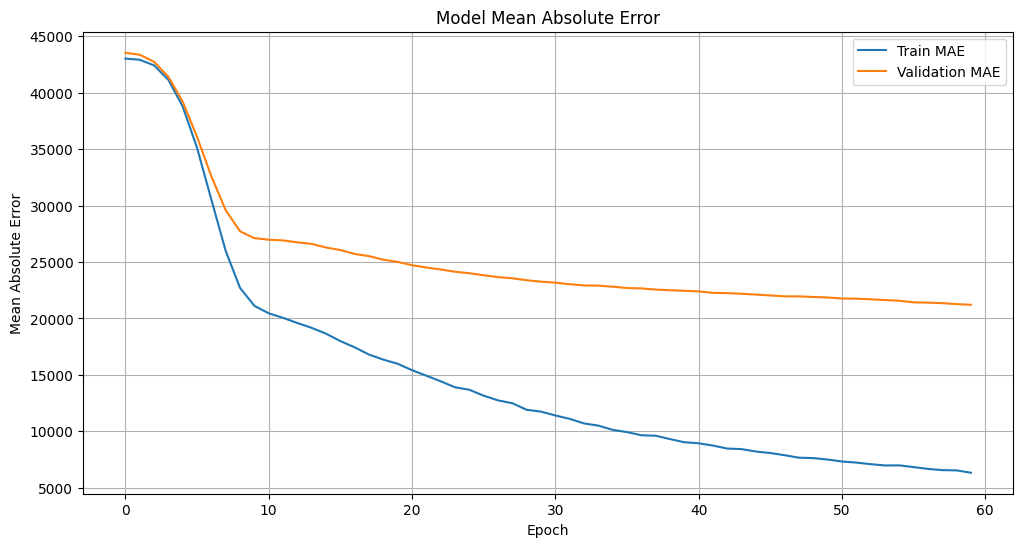

In [41]:
import matplotlib.pyplot as plt

# Plot training & validation MAE values
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()


In [1]:
print(" hello wrold ! ")

 hello wrold ! 
